# Problem 3 - Weight Initialization, Dead Neurons, Leaky ReLU

## 3.1

11490434/11490434 [==============================] - 1s 0us/step


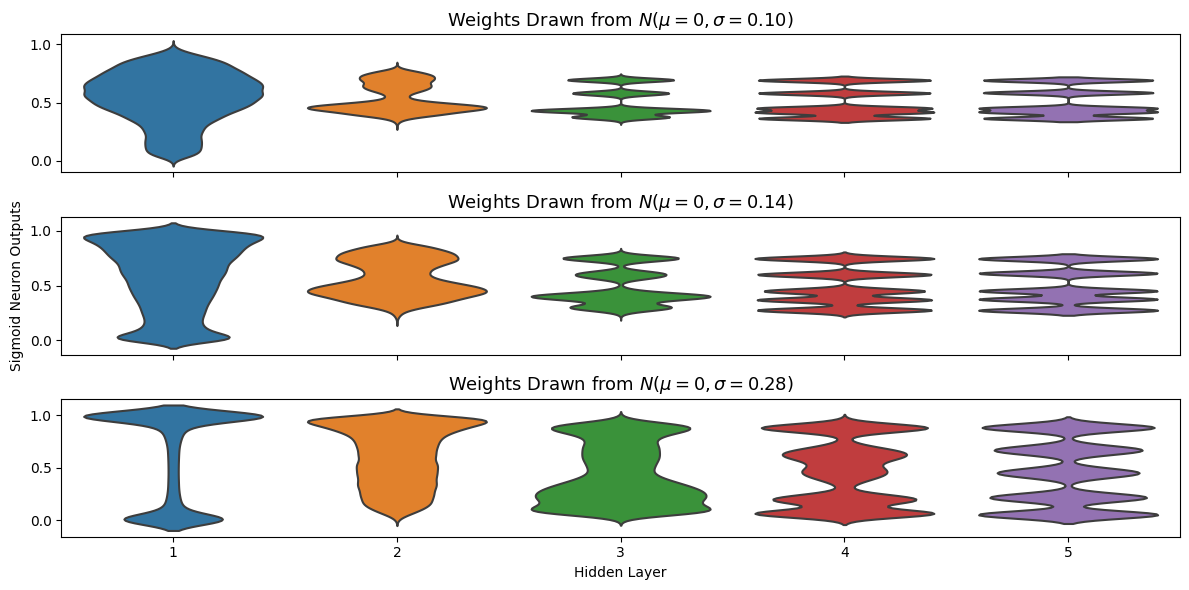

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28


x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'sigmoid'
    input_shape = (data_dim,)
    bias_initializer = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    #ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Sigmoid Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()


Looking at all 3 subplots we can notice that increasing the number of hidden layers neuron outputs start to group / cluster more around extreme values 1, 0. This is what we call vanishing gradient problem and this can significanly hinder our learning, especially when using deep networks with a lot of layers. We can notice that increasing the standard deviation does make our outputs more diverse but it also leads to more clustring to extremes even in earlier layers. This shows us how important it is to carefully initiate weights especially when using networks with many layers.

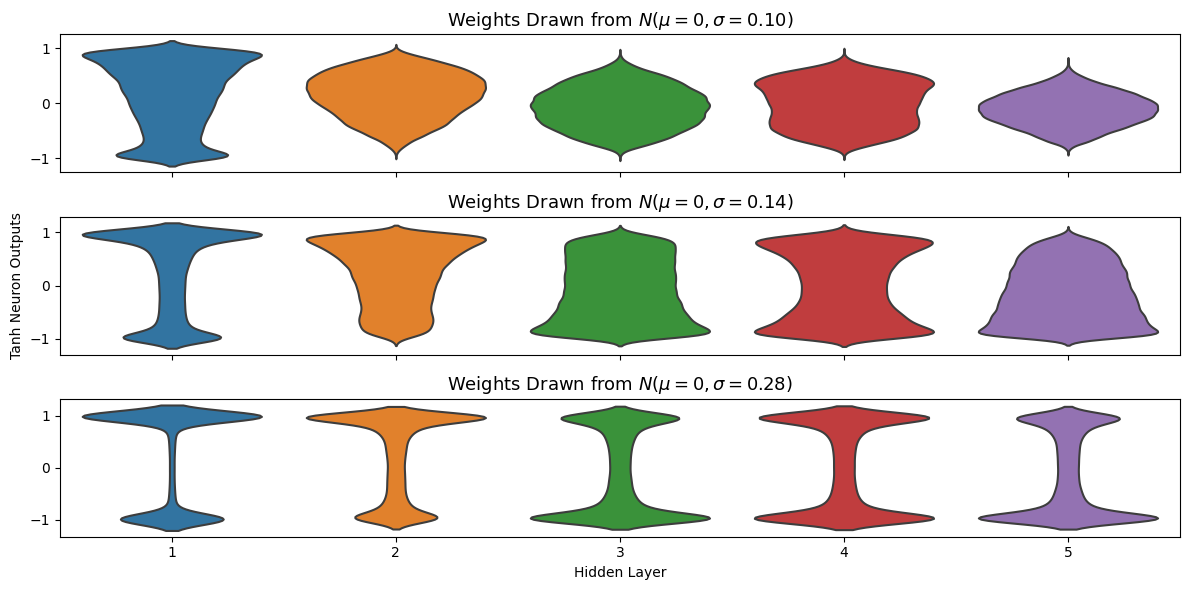

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28


x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'tanh'
    input_shape = (data_dim,)
    bias_initializer = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    #ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tanh Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()


**Answer:**

Comparing these graphs to sigmoid we can see that they are much more diverse, especially for  but just like with sigmoid they cluster around the extremes, 1 and -1. This is especially prominent in higher standard deviations. For lower standard deviations, 0.1, we can notice that it clusters around 0 which would mean that the neuron outputs are around 0. Just like with sigmoid this shows the importance of carefull weight initialization.


## 3.2

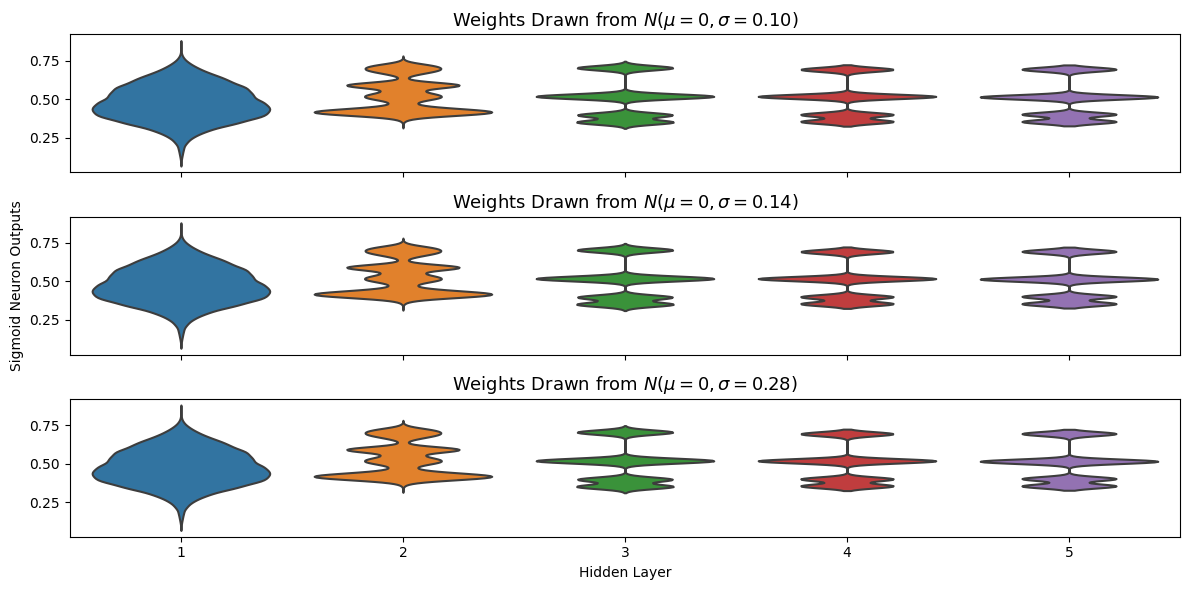

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault

seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28


x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=seed)
    activation = 'sigmoid'
    input_shape = (data_dim,)
    bias_initializer = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    #ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Sigmoid Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()


First thing we can notice is that all three subplots for varying standard deviations look the same. After some research, I belive that this is becuse Xavier normal initialization draws samples from normal distribution that is centered at 0 and does not rely on standard deviaiton (as we did not define it in when calling on the initializer in the code). This helps with making variance equal when using different standard deviationa but also helps with making the data cluster around the center - 0.5 rather than extremes. However, this is less prominent for deeper layers.

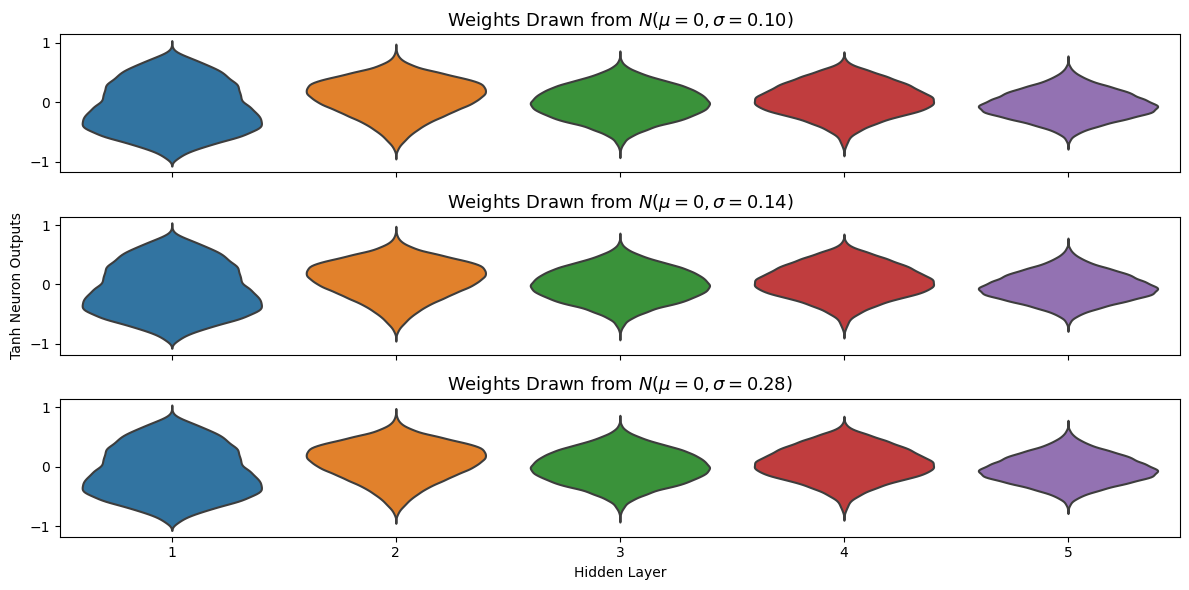

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault


seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28


x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.GlorotNormal(seed=seed)
    activation = 'tanh'
    input_shape = (data_dim,)
    bias_initializer = 'zeros'
    kernel_initializer = init

    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.RMSprop(),
                  metrics=['accuracy'])

    mode = 0.0
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations([x_test])

    n_layers = len(model.layers)
    i_output_layer = n_layers - 1


    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))

n_rows = int(len(sigmas) / 1 + int(len(sigmas) % 1 > 0))

if not fig:
    default_figsize = rcParamsDefault['figure.figsize']
    fig = plt.figure(figsize=(
        default_figsize[0] * 1,
        default_figsize[1] * n_rows
    ))


axes_list = [plt.subplot(n_rows, 1, i+1) for i in range(len(sigmas))]

for i, sig in enumerate(sigmas):
    ax = axes_list[i]
    #ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tanh Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()


Just like with sigmoid we can notice that using Xavier normalization makes all the subplots identical regardless of the standard deviation. However, we can notice that the normalization is much more standarized for tanh than sigmoid as it makes all the neuron outputs almost identical for every layer past the first layer. Further, we can also notice that with increasing layers data clusters more and more and around 0 and the output becomes more narrow. Thus, we can conclude that using Xavier normalization minimized vanishing gradient problem.

**Answer:**

## 3.3

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Hyperparameters
n_simulations = 1000
n_points = 3000
batch_size = 64
n_epochs = 20
n_hidden_layers = 10
dim_layer = 2

# Define the function (Assuming f(x) = |x|)
def f(x):
    return abs(x)

# Create a neural network model with ReLU activations
def create_model():
    model = Sequential()
    model.add(Dense(dim_layer, activation='relu', input_shape=(1,)))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

collapsed_count = 0

for i in range(n_simulations):
    #print(i)
    # Generate training data
    x_train = np.random.uniform(-np.sqrt(7), np.sqrt(7), n_points)
    y_train = f(x_train)

    # Train the model
    model = create_model()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1)

    # Check for network collapse by predicting on some test points
    test_points = np.linspace(-np.sqrt(7), np.sqrt(7), 100)
    predictions = model.predict(test_points)

    # Check if all predictions are approximately equal
    if np.allclose(predictions, predictions[0], atol=1e-2):
        collapsed_count += 1

collapse_fraction = collapsed_count / n_simulations
print(f"Fraction of collapsed simulations: {collapse_fraction:.2f}")


4/4 [==============================] - 0s 3ms/step
Fraction of collapsed simulations: 0.97


In [9]:
print(f"Fraction of collapsed simulations: {collapse_fraction:.2f}")

Fraction of collapsed simulations: 0.97


**Answer:**

The fraction of collapsed simulations is 97% (0.97) compared to 93.6% from the article. Our fraction might be slightly higher than the one reported in the article due to different model structure or hyperparameter initialization or even randomization. This is due to the phenomenon of dying ReLU.

## 3.4

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

# Hyperparameters
n_simulations = 1000
n_points = 3000
batch_size = 64
n_epochs = 20
n_hidden_layers = 10
dim_layer = 2

# Define the function (Assuming f(x) = x^2)
def f(x):
    return abs(x)

# Create a neural network model with Leaky ReLU activations
def create_model():
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=(1,)))
    model.add(LeakyReLU(alpha=0.01))
    for _ in range(n_hidden_layers):
        model.add(Dense(dim_layer))
        model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

collapsed_count = 0

for i in range(n_simulations):
    # Generate training data
    print("Iteration:", i)
    x_train = np.random.uniform(-np.sqrt(7), np.sqrt(7), n_points)
    y_train = f(x_train)

    # Train the model
    model = create_model()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1)

    # Check for network collapse by predicting on some test points
    test_points = np.linspace(-np.sqrt(7), np.sqrt(7), 100)
    predictions = model.predict(test_points)

    # Check if all predictions are approximately equal
    if np.allclose(predictions, predictions[0], atol=1e-2):
        collapsed_count += 1

collapse_fraction = collapsed_count / n_simulations
print(f"Fraction of collapsed simulations: {collapse_fraction:.2f}")



Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 5ms/step
Iteration: 881
Epoch 1/20
47/47 [==============================] - 2s 4ms/step - loss: 2.2754
Epoch 2/20
47/47 [==============================] - 0s 4ms/step - loss: 2.1551
Epoch 3/20
47/47 [==============================] - 0s 4ms/step - loss: 2.0408
Epoch 4/20
47/47 [==============================] - 0s 3ms/step - loss: 1.9320
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 1.8290
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 1.7308
Epoch 7/20
47/47 [==============================] - 0s 4ms/step - loss: 1.6377
Epoch 8/20
47/47 [==============================] - 0s 4ms/step - loss: 1.5489
Epoch 9/20
47/47 [==============================] - 0s 4ms/step - loss: 1.4637
Epoch 10/20
47/47 [==============================] - 0s 4ms/step - loss: 1.3814
Epoch 11/20
47/47 [==============================] - 0s 4ms/step - loss: 1.3002
Epoch 12/20


In [3]:
print(f"Fraction of collapsed simulations: {collapse_fraction:.2f}")

Fraction of collapsed simulations: 0.35


**Answer:**

Using Leaky ReLU significantly decreases the fraction of collaped simulations to 35% (0.35) from 97%. This is due to the fact it allows us to use small, non-zero graident when the unit is inactive (0.01z) which ensures that the neurons stay alive and continue to adjust to weights during training rather than dying. Thus, using Leaky ReLu sucesfully reduces the chance of the network colapsing as we saw in our case.